## Project 01
#### Question 01
Please find below a visual comparison of KNN and linear regression: <br>
As we can see KNN relatively does a better job at classification than linear regression. Linear regression builts only a baseline model with Yhat value which is almost a constant. Even though both the models have a very low accuracy 60% for KNN and 49.9% for linear regression, KNN builts a more discrete and distributed classification. Getting a low accuracy with such an overlapping data is inevitable <br>
The total number of households unhappy with linear regression model are: 501 <br>
The total number of households unhappy with KNN model are: 397 <br>

#### Question 02
Do find below a plot of k(no of neighbors) vs accuracy. As you can see with increase in k value the accuracy decreases but after k around 8 the variance in accuracy is less. When we have a low value of k our KNN model overfits our data, thus we get an accuracy of around 98% and it drops dractically after that as our data has a lot of overlap and the distance between points with different labels is less. We can't have the value of k very high as it high k value our predictions won't be able to capture the small naunces in the data and would lead to misclassification. Thus it's a bargain between overfitting and high misclassification. I would say we can pick a value between 7-13 where the the variance in the accuracy isn't significant.

The same goes with step size. Low step size would lead to overfitting as it adds some granuality to the classification. We get more flexibility in drawing finer and smoother boundaries, whereas with high stepsize we would get big and rough edges. Low step thus lead to overfitting and very high step value leads to less accuracy. In our data xmax -xmin = 118.56 and ymax- ymin = 290.65 a step size of 2-3 would be a safe choice as it covers significant amount of area in each block and also captures the granularity

#### Question 03
We will be considering following four metrices for our KNN distance calculation: <br>
(a) Euclidean <br>
(b) Manhattan <br>
(c) Canberra <br>
(d) Chebyshev <br>

From the scatter and the box plot shown towards the end we can say that the difference in the accuracy(with different k values) of the KNN model on changing the distance metric is not significant. There is not as such distinction on which metrics would perform better than the other from visual analysis or based on their accuracy value. The later 3 metrics perform the same when compared with Euclidean metric thus would follow the same criteria for k and step selection. If we compare them with the linear regression though all the models would perform better than lm given with an optimum k and step selection. <br>

Based on the context of the question and the input data Manhattan or Chebyshev metric has a better representation of distance between two points. As this distance divides area in size of small blocks (shown later) which is some way how US states and areas are divided so this voting area divide will be analogous to physical division of the area.


In [1]:
#_________________LIBRARIES_________________
import numpy as np
import pandas as pd
from numpy.linalg import inv #for matrix algebra
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns; sns.set()
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as knn

## Functions

In [2]:
#________________FUNCTIONS_____________________

def dist1(x1, y1, x2, y2):
    """
    dist(float, float, float, float) --> float

    dist returns distance between
    points (x1, y1) and (x2, y2)
    """

    #definition of distance as Euclidean
    d = (x1 - x2)**2 + (y1 - y2)**2

    return math.sqrt(d)

def dist2(x1, y1, x2, y2):

    #definition of distance as Manhattan
    d = abs(x1 - x2) + abs(y1 - y2)
    return d

def dist3(x1, y1, x2, y2):

    #definition of distance as Canberra
    d = abs(x1 - x2)/ (abs(x1)+ abs(x2)) + abs(y1 - y2)/ (abs(y1)+ abs(y2))
    return d

def dist4(x1, y1, x2, y2):

    #definition of distance as Chebyshev
    d = max(abs(x1 - x2),abs(y1 - y2))
    return d

def mean_cat(dists):
    """
    mean_cat(array) --> float

    mean_cat produces the averge category
    """

    sum = 0.0

    for i in range(len(dists)):
        sum = sum + float(dists[i][1])

    return float(sum/len(dists))


## Reading the data

In [3]:
data_votes = pd.read_csv('C:\\Users\\Sanchayni\\Desktop\\IIT\\Fall18\\Statistical_Learning\\Project01\p1_data.txt', sep=" ",
                   header = None)
data_votes.columns = ["X", "Y", "label"]

In [4]:
data_votes.head()

,X,Y,label
0,-7.644500,108.645100,1
1,47.463637,-79.438786,1
2,6.487614,-6.583677,0
3,-27.333037,-57.638238,0
4,46.456666,33.872351,0


## Plotting the data

In [5]:
plt.rcParams['figure.figsize'] = (10,6)

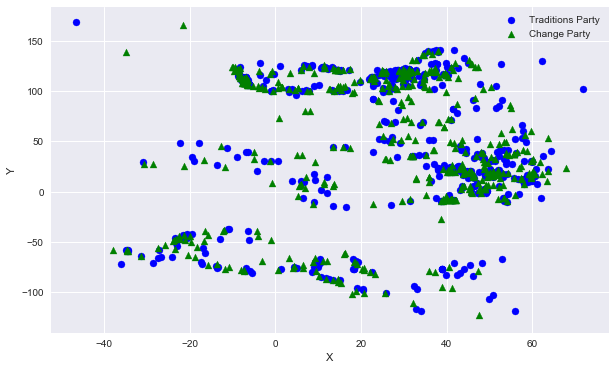

In [6]:
data00 = data_votes[data_votes['label']==0]
data01 = data_votes[data_votes['label'] == 1]

plt.scatter(data00['X'],data00['Y'],c= 'b',marker = 'o')
plt.scatter(data01['X'],data01['Y'],c= 'g',marker = '^')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend(('Traditions Party','Change Party'))
plt.show()

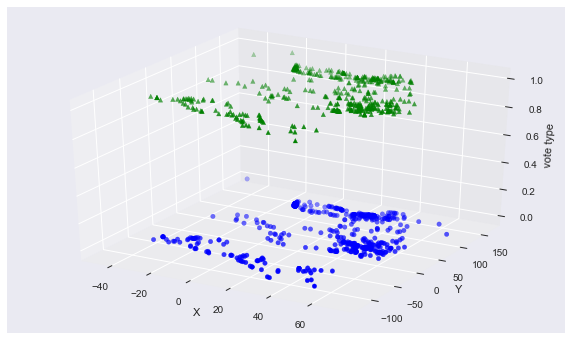

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = data00['X'], ys = data00['Y'], zs= data00['label'], c= 'b', marker = 'o')
ax.scatter(xs = data01['X'], ys = data01['Y'], zs= data01['label'], c= 'g', marker = '^')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('vote type')

plt.show()

## Linear Regression

In [8]:
# Linear regression
regr = lm.LinearRegression()

In [9]:
X = pd.DataFrame(data_votes,columns=['X', 'Y'])
Y = pd.DataFrame(data_votes, columns=['label'])

In [10]:
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The intercept
print('Intercept: \n',regr.intercept_)

Coefficients: 
 [[-2.11481077e-05  4.95358722e-05]]
Intercept: 
 [0.49526602]


Setting Treshold

In [12]:
Predictions = pd.DataFrame(np.where(regr.predict(X)<=0.49526602,0,1), columns=['lm_pred'])

In [13]:
plt.rcParams['figure.figsize'] = (6,6)

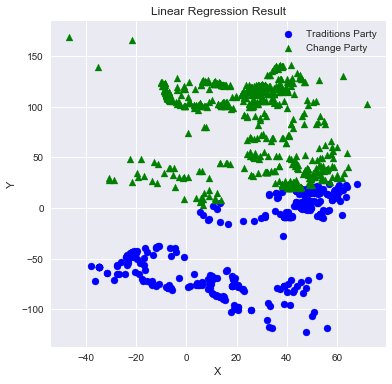

In [14]:
lm_result =  pd.concat([data_votes,Predictions],axis = 1)
lmdata00 = lm_result[lm_result['lm_pred']==0]
lmdata01 = lm_result[lm_result['lm_pred'] == 1]

plt.scatter(lmdata00['X'],lmdata00['Y'],c= 'b',marker = 'o')
plt.scatter(lmdata01['X'],lmdata01['Y'],c= 'g',marker = '^')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Result')
plt.legend(('Traditions Party','Change Party'))
plt.show()

## Confusion Matrix for lm

In [15]:
from sklearn.metrics import confusion_matrix
votes_true = data_votes['label']
votes_pred = Predictions
tn, fp, fn, tp = confusion_matrix(votes_true,votes_pred).ravel()
(tn, fp, fn, tp)

(183, 320, 181, 316)

In [16]:
accuracy_of_lm = (tn+tp)*100/ 1000
accuracy_of_lm

49.9

## Plotting the Regression Plane

In [17]:
X1,Y1 = np.meshgrid(data_votes['X'],data_votes['Y'])
Z = X1*-2.11481077e-05 +Y1*4.95358722e-05 +0.49526602

In [18]:
plt.rcParams['figure.figsize'] = (10,6)

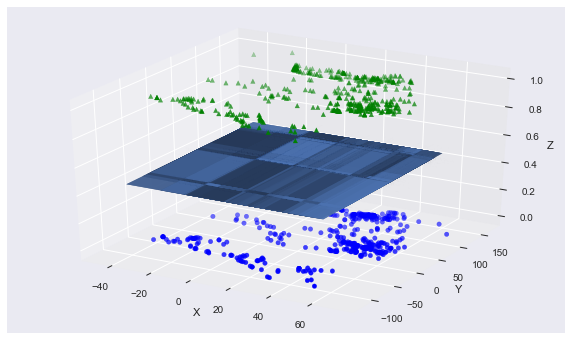

In [19]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X1, Y1, Z,alpha=0.5)

ax.scatter(xs = data00['X'], ys = data00['Y'], zs= data00['label'], c= 'b', marker = 'o')
ax.scatter(xs = data01['X'], ys = data01['Y'], zs= data01['label'], c= 'g', marker = '^')

plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()

## KNN mesh

In [46]:
#________________K-NN_____________________
#Here, we do k-nearest neighbor algorithm
#first, we determine our area and step-size

k = 10 #number of neighbors

#------------Mesh over domain------------

step = 2

In [47]:
import math

xmax = max(data_votes['X'])
ymax = max(data_votes['Y'])
xmin = min(data_votes['X'])
ymin = min(data_votes['Y'])

In [48]:
(xmax-xmin),ymax-ymin

(118.56631030000001, 290.6541111)

In [49]:
n_x, n_y = int(math.floor((xmax-xmin)/step)), int(math.floor((ymax-ymin)/step))
x_mesh, y_mesh = [], []

In [50]:
x = xmin
y = ymin
for i in range(n_x):
    x = x + step
    x_mesh.append(x)

for j in range(n_y):
    y = y + step
    y_mesh.append(y)

distances = []
answer = []
n = len(data_votes)

In [51]:
M = data_votes.values.tolist()

In [26]:
#------------Classify Mesh------------

etc = int(round(n_x*n_y/750)) #an estimate for time

print("The kNN mesh classification may take about %d seconds" %etc)

for p in range(len(x_mesh)):
    for q in range(len(y_mesh)):
        distances = []
        for r in range(n):
            d = dist1(x_mesh[p], y_mesh[q], M[r][0], M[r][1])
            distances.append([ d, M[r][2] ])
        distances.sort(key=lambda x: x[0]) #sorts by distance, not category
        distances = distances[0:k] #takes top k ---> Is this ok??
        cat = round(mean_cat(distances))
        answer.append([x_mesh[p], y_mesh[q], cat])

#------------Print Solution------------
#our coefficients for linear regression


The kNN mesh classification may take about 11 seconds


In [27]:
Output = pd.DataFrame(answer,columns=['X', 'Y','label_mesh'])

In [28]:
plt.rcParams['figure.figsize'] = (12,8)

In [29]:
color_data = np.where(data_votes['label']==0,'b','g')
color_output = np.where(Output['label_mesh']==0,'lightblue','lightgreen')

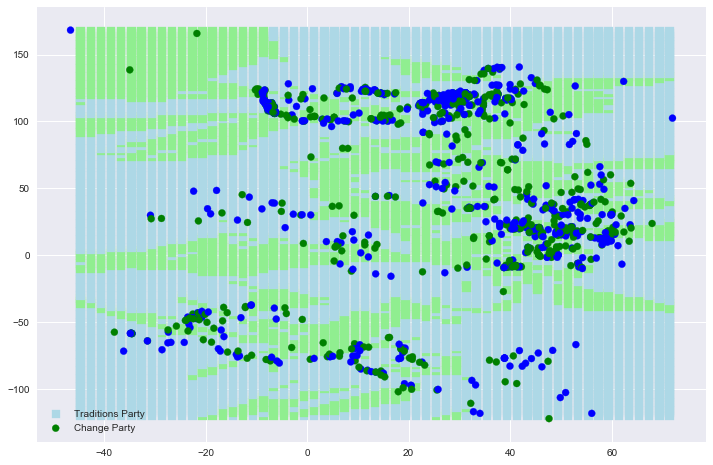

In [30]:
plt.scatter(Output['X'],Output['Y'],c= color_output,s = 2*35,marker = 's')
plt.scatter(data_votes['X'],data_votes['Y'],c= color_data ,marker = 'o')
plt.legend(('Traditions Party','Change Party'))
plt.show()

## KNN Vs Linear Regression

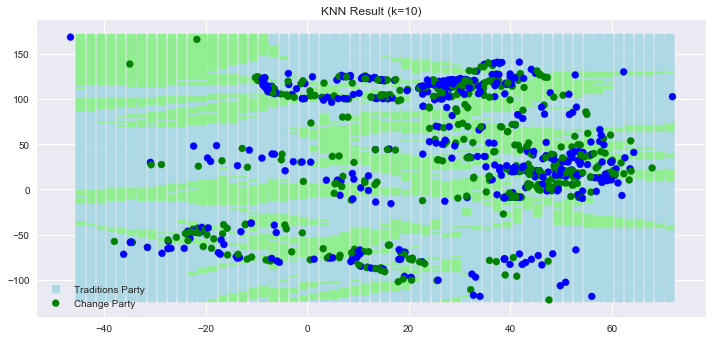

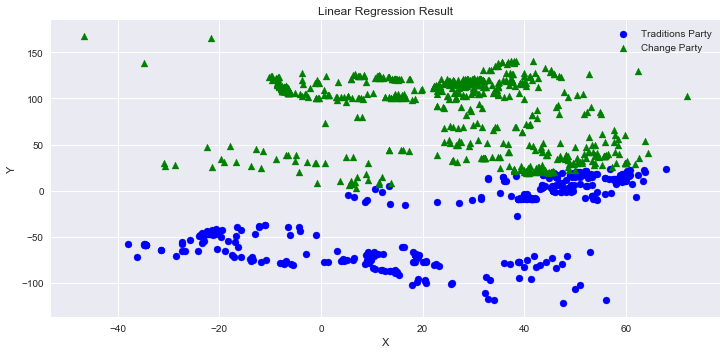

In [32]:
plt.rcParams['figure.figsize'] = (12,12)
plt.subplot(211)

plt.scatter(Output['X'],Output['Y'],c= color_output,s=2*35,marker = 's')
plt.scatter(data_votes['X'],data_votes['Y'],c= color_data ,marker = 'o')
plt.legend(('Traditions Party','Change Party'))
plt.title('KNN Result (k=10)')
plt.show()

plt.subplot(212)

plt.scatter(lmdata00['X'],lmdata00['Y'],c= 'b',marker = 'o')
plt.scatter(lmdata01['X'],lmdata01['Y'],c= 'g',marker = '^')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Result')
plt.legend(('Traditions Party','Change Party'))
plt.show()

### Linear Regression Vs KNN (using scikit)

In [54]:
classifier = knn(n_neighbors=10)
classifier.fit(X,Y['label']) 
knn_y_pred = pd.DataFrame(classifier.predict(X), columns = ['knn_pred'])

In [59]:
knn_result =  pd.concat([data_votes,knn_y_pred],axis = 1)

knn_result['knn_misclassification'] = np.where(knn_result['label']==knn_result['knn_pred'],0,1)
knn_result['lm_misclassification'] = np.where(lm_result['label']==lm_result['lm_pred'],0,1)

knnmcdata00 = knn_result[knn_result['knn_misclassification']==0]
knnmcdata01 = knn_result[knn_result['knn_misclassification']== 1] # Misclassified

lmmcdata00 = knn_result[knn_result['lm_misclassification']==0]
lmmcdata01 = knn_result[knn_result['lm_misclassification']==1] # Misclassified

#lm_result.head()


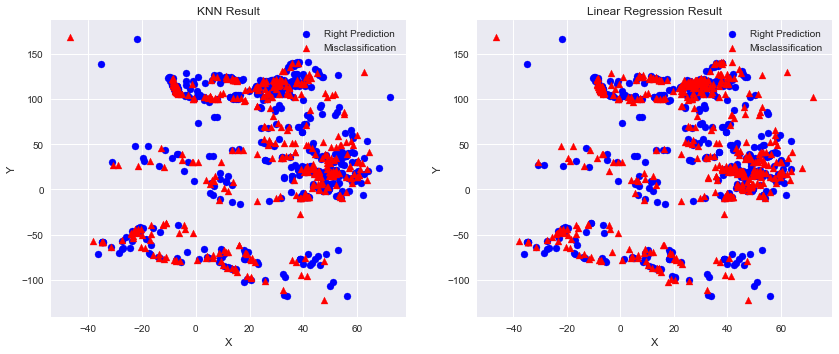

In [35]:
plt.rcParams['figure.figsize'] = (14,12)
plt.subplot(221)

plt.scatter(knnmcdata00['X'],knnmcdata00['Y'],c= 'b',marker = 'o')
plt.scatter(knnmcdata01['X'],knnmcdata01['Y'],c= 'r',marker = '^')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('KNN Result')
plt.legend(('Right Prediction','Misclassification'))

plt.subplot(222)

plt.scatter(lmmcdata00['X'],lmmcdata00['Y'],c= 'b',marker = 'o')
plt.scatter(lmmcdata01['X'],lmmcdata01['Y'],c= 'r',marker = '^')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Result')
plt.legend(('Right Prediction','Misclassification'))
plt.show()

### Plotting accuracy across increasing k value

In [60]:
accuracy_knn = []
k_vals = []
for i in range(19):
    classifier = knn(n_neighbors=i+1)  
    classifier.fit(X,Y['label']) 
    knn_y_pred = classifier.predict(X)
    tn, fp, fn, tp = confusion_matrix(Y['label'], knn_y_pred).ravel()
    accuracy_knn.append((tp+tn)*100/ 1000)
    k_vals.append(i+1)

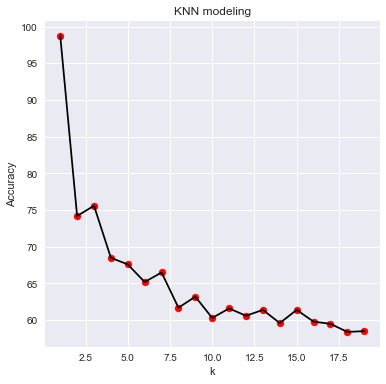

In [61]:
plt.rcParams['figure.figsize'] = (6,6)
plt.scatter(k_vals,accuracy_knn,c= 'r',marker = 'o')
plt.plot(k_vals,accuracy_knn,c='black')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN modeling')

plt.show()

## KNN for different values of k

In [62]:
step = 1
answer = [[],[],[],[]]

In [63]:
#------------Classify Mesh------------
k = 1
answer01=[]

for k in range(4):
    answer[k] = []
    for p in range(len(x_mesh)):
        for q in range(len(y_mesh)):
            distances = []
            for r in range(n):
                d = dist1(x_mesh[p], y_mesh[q], M[r][0], M[r][1])
                distances.append([ d, M[r][2] ])
            distances.sort(key=lambda x: x[0]) #sorts by distance, not category
            distances = distances[0:(k*20)+ 1] #takes top k ---> Is this ok??
            cat = round(mean_cat(distances))
            answer[k].append([x_mesh[p], y_mesh[q], cat])
            
            

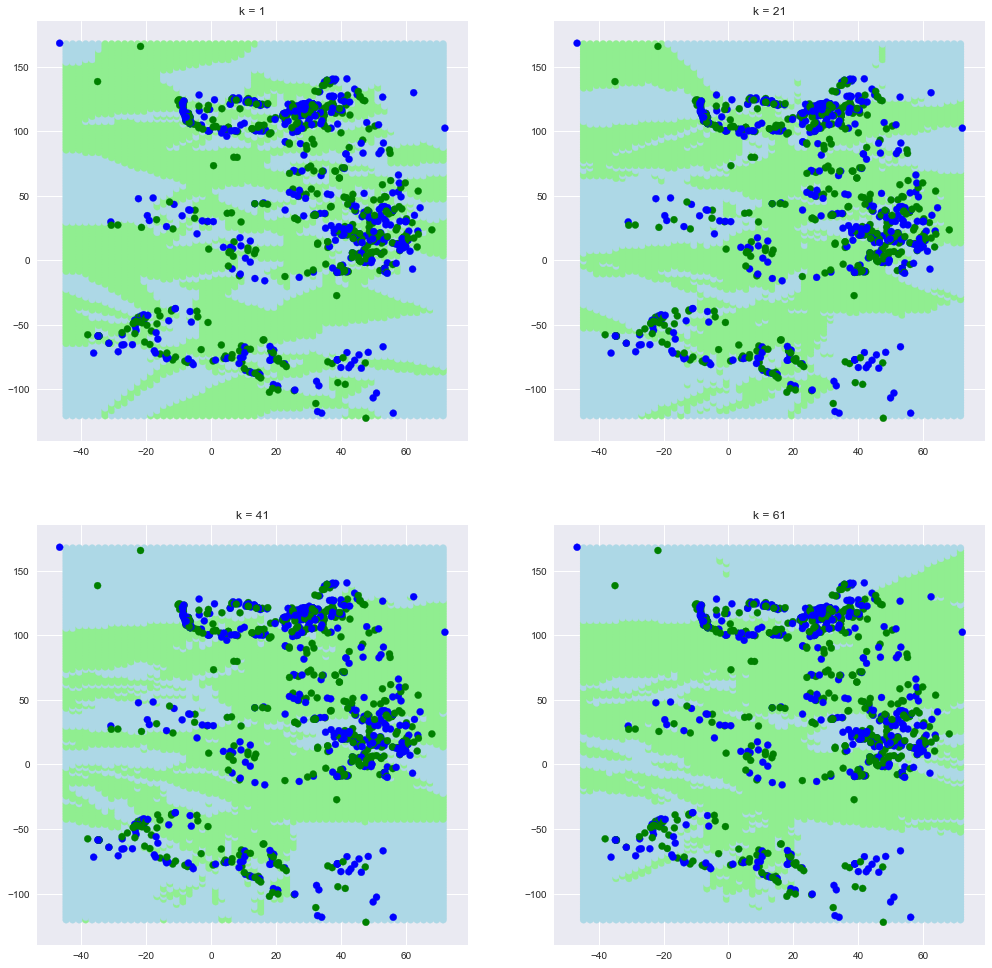

In [64]:
plt.rcParams['figure.figsize'] = (17,17)

color_data = np.where(data_votes['label']==0,'b','g')
plt.subplot(221)

Output01 = pd.DataFrame(answer[0],columns=['X', 'Y','label_mesh'])
color_output01 = np.where(Output01['label_mesh']==0,'lightblue','lightgreen')
plt.scatter(Output01['X'],Output01['Y'],c= color_output01,marker = 'o')
plt.scatter(data_votes['X'],data_votes['Y'],c= color_data ,marker = 'o')
plt.title('k = 1')


plt.subplot(222)

Output02 = pd.DataFrame(answer[1],columns=['X', 'Y','label_mesh'])
color_output02 = np.where(Output02['label_mesh']==0,'lightblue','lightgreen')
plt.scatter(Output02['X'],Output02['Y'],c= color_output02,marker = 'o')
plt.scatter(data_votes['X'],data_votes['Y'],c= color_data ,marker = 'o')
plt.title('k = 21')


plt.subplot(223)

Output03 = pd.DataFrame(answer[2],columns=['X', 'Y','label_mesh'])
color_output03 = np.where(Output03['label_mesh']==0,'lightblue','lightgreen')
plt.scatter(Output03['X'],Output03['Y'],c= color_output03,marker = 'o')
plt.scatter(data_votes['X'],data_votes['Y'],c= color_data ,marker = 'o')
plt.title('k = 41')


plt.subplot(224)

Output04 = pd.DataFrame(answer[3],columns=['X', 'Y','label_mesh'])
color_output04 = np.where(Output04['label_mesh']==0,'lightblue','lightgreen')
plt.scatter(Output04['X'],Output04['Y'],c= color_output04,marker = 'o')
plt.scatter(data_votes['X'],data_votes['Y'],c= color_data ,marker = 'o')
plt.title('k = 61')
plt.show()

## KNN for different values of steps

In [66]:
k = 6
answer = [[],[],[],[]]
distances = []

n = len(data_votes)

#------------Classify Mesh------------
for s in range(1,5):
    step = s
    n_x, n_y = int(math.floor((xmax-xmin)/step)), int(math.floor((ymax-ymin)/step))
    x_mesh, y_mesh = [], []
    x = xmin
    y = ymin
    for i in range(n_x):
        x = x + step
        x_mesh.append(x)

    for j in range(n_y):
        y = y + step
        y_mesh.append(y)
    
    for p in range(len(x_mesh)):
        for q in range(len(y_mesh)):
            distances = []
            for r in range(n):
                d = dist1(x_mesh[p], y_mesh[q], M[r][0], M[r][1])
                distances.append([ d, M[r][2] ])
            distances.sort(key=lambda x: x[0]) #sorts by distance, not category
            distances = distances[0:k] #takes top k ---> Is this ok??
            cat = round(mean_cat(distances))
            answer[s-1].append([x_mesh[p], y_mesh[q], cat])

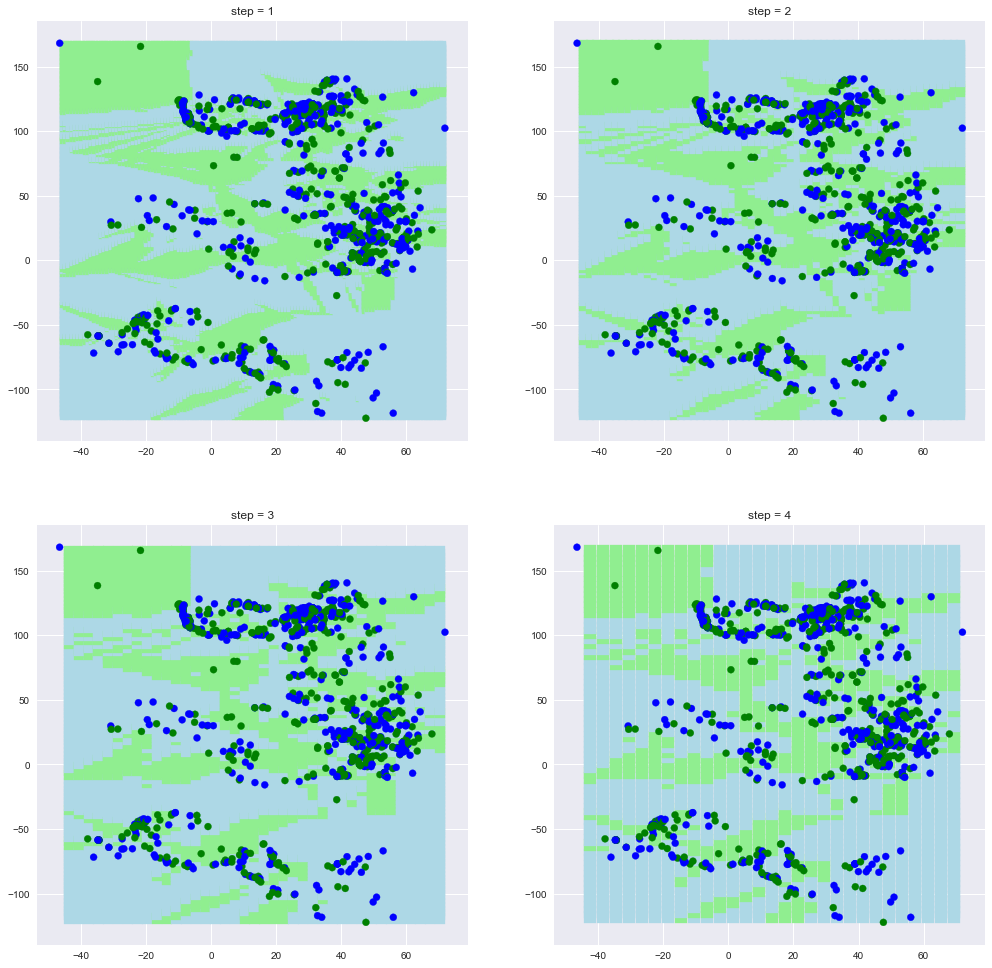

In [67]:
plt.rcParams['figure.figsize'] = (17,17)

color_data = np.where(data_votes['label']==0,'b','g')
plt.subplot(221)

Output01 = pd.DataFrame(answer[0],columns=['X', 'Y','label_mesh'])
color_output01 = np.where(Output01['label_mesh']==0,'lightblue','lightgreen')
plt.scatter(Output01['X'],Output01['Y'],c= color_output01,s = 1*35,marker = 's')
plt.scatter(data_votes['X'],data_votes['Y'],c= color_data ,marker = 'o')
plt.title('step = 1')


plt.subplot(222)

Output02 = pd.DataFrame(answer[1],columns=['X', 'Y','label_mesh'])
color_output02 = np.where(Output02['label_mesh']==0,'lightblue','lightgreen')
plt.scatter(Output02['X'],Output02['Y'],c= color_output02,s = 2*35,marker = 's')
plt.scatter(data_votes['X'],data_votes['Y'],c= color_data ,marker = 'o')
plt.title('step = 2')


plt.subplot(223)

Output03 = pd.DataFrame(answer[2],columns=['X', 'Y','label_mesh'])
color_output03 = np.where(Output03['label_mesh']==0,'lightblue','lightgreen')
plt.scatter(Output03['X'],Output03['Y'],c= color_output03,s = 3*35,marker = 's')
plt.scatter(data_votes['X'],data_votes['Y'],c= color_data ,marker = 'o')
plt.title('step = 3')


plt.subplot(224)

Output04 = pd.DataFrame(answer[3],columns=['X', 'Y','label_mesh'])
color_output04 = np.where(Output04['label_mesh']==0,'lightblue','lightgreen')
plt.scatter(Output04['X'],Output04['Y'],c= color_output04,s = 4*35,marker = 's')
plt.scatter(data_votes['X'],data_votes['Y'],c= color_data ,marker = 'o')
plt.title('step = 4')
plt.show()

### Comparing different distance metrics

In [69]:
k = 7 
step = 2
n_x, n_y = int(math.floor((xmax-xmin)/step)), int(math.floor((ymax-ymin)/step))
x_mesh, y_mesh = [], []
x = xmin
y = ymin
for i in range(n_x):
    x = x + step
    x_mesh.append(x)

for j in range(n_y):
    y = y + step
    y_mesh.append(y)

distances = []
answer = []
n = len(data_votes)

In [70]:
## Euclidean

#------------Classify Mesh------------
answer_d1 = []
etc = int(round(n_x*n_y/750)) #an estimate for time

print("The kNN mesh classification may take about %d seconds" %etc)

for p in range(len(x_mesh)):
    for q in range(len(y_mesh)):
        distances = []
        for r in range(n):
            d = dist1(x_mesh[p], y_mesh[q], M[r][0], M[r][1])
            distances.append([ d, M[r][2] ])
        distances.sort(key=lambda x: x[0]) #sorts by distance, not category
        distances = distances[0:k] #takes top k ---> Is this ok??
        cat = round(mean_cat(distances))
        answer_d1.append([x_mesh[p], y_mesh[q], cat])


The kNN mesh classification may take about 11 seconds


In [71]:
## Manhattan

#------------Classify Mesh------------
answer_d2 = []
etc = int(round(n_x*n_y/750)) #an estimate for time

print("The kNN mesh classification may take about %d seconds" %etc)

for p in range(len(x_mesh)):
    for q in range(len(y_mesh)):
        distances = []
        for r in range(n):
            d = dist2(x_mesh[p], y_mesh[q], M[r][0], M[r][1])
            distances.append([ d, M[r][2] ])
        distances.sort(key=lambda x: x[0]) #sorts by distance, not category
        distances = distances[0:k] #takes top k ---> Is this ok??
        cat = round(mean_cat(distances))
        answer_d2.append([x_mesh[p], y_mesh[q], cat])


The kNN mesh classification may take about 11 seconds


In [72]:
## Canberra 

#------------Classify Mesh------------
answer_d3 = []
etc = int(round(n_x*n_y/750)) #an estimate for time

print("The kNN mesh classification may take about %d seconds" %etc)

for p in range(len(x_mesh)):
    for q in range(len(y_mesh)):
        distances = []
        for r in range(n):
            d = dist3(x_mesh[p], y_mesh[q], M[r][0], M[r][1])
            distances.append([ d, M[r][2] ])
        distances.sort(key=lambda x: x[0]) #sorts by distance, not category
        distances = distances[0:k] #takes top k ---> Is this ok??
        cat = round(mean_cat(distances))
        answer_d3.append([x_mesh[p], y_mesh[q], cat])

The kNN mesh classification may take about 11 seconds


In [73]:
## Chebyshev

#------------Classify Mesh------------
answer_d4 = []
etc = int(round(n_x*n_y/750)) #an estimate for time

print("The kNN mesh classification may take about %d seconds" %etc)

for p in range(len(x_mesh)):
    for q in range(len(y_mesh)):
        distances = []
        for r in range(n):
            d = dist4(x_mesh[p], y_mesh[q], M[r][0], M[r][1])
            distances.append([ d, M[r][2] ])
        distances.sort(key=lambda x: x[0]) #sorts by distance, not category
        distances = distances[0:k] #takes top k ---> Is this ok??
        cat = round(mean_cat(distances))
        answer_d4.append([x_mesh[p], y_mesh[q], cat])

The kNN mesh classification may take about 11 seconds


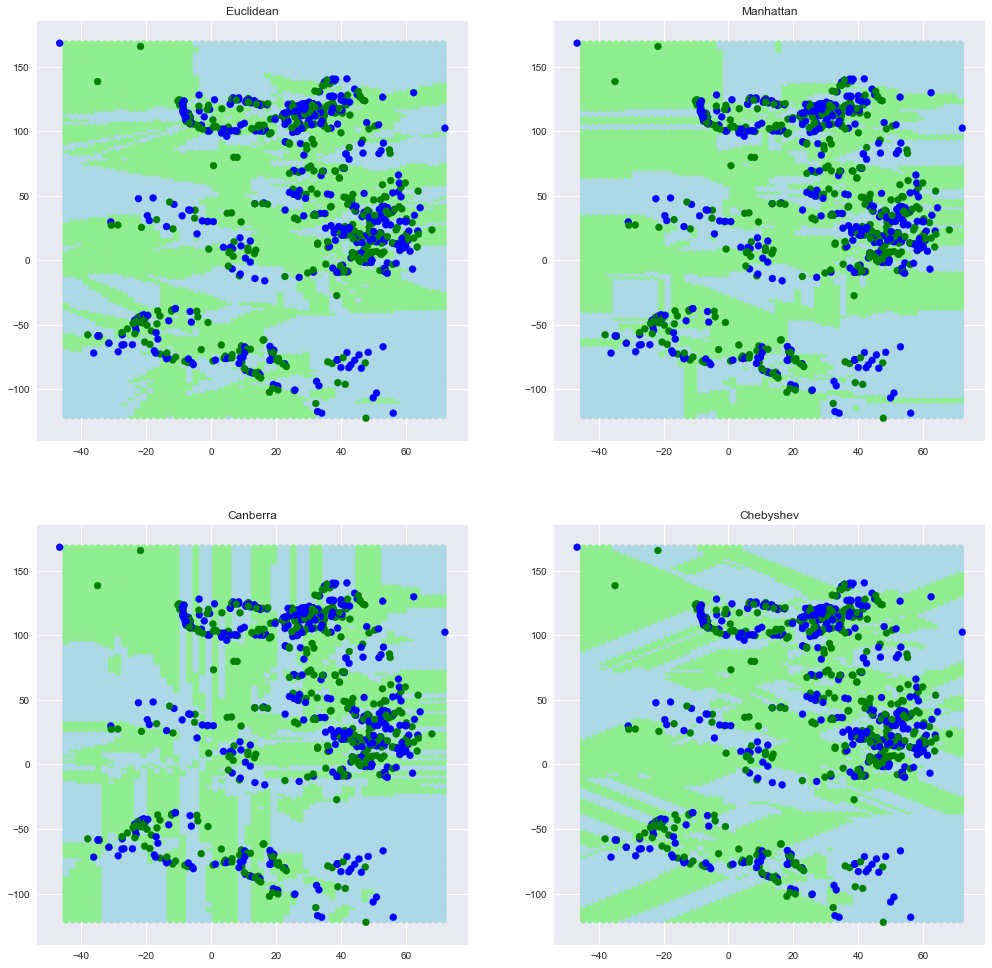

In [74]:
plt.rcParams['figure.figsize'] = (17,17)

color_data = np.where(data_votes['label']==0,'b','g')
plt.subplot(221)

Output01 = pd.DataFrame(answer_d1,columns=['X', 'Y','label_mesh'])
color_output01 = np.where(Output01['label_mesh']==0,'lightblue','lightgreen')
plt.scatter(Output01['X'],Output01['Y'],c= color_output01,marker = 'o')
plt.scatter(data_votes['X'],data_votes['Y'],c= color_data ,marker = 'o')
plt.title('Euclidean')


plt.subplot(222)

Output02 = pd.DataFrame(answer_d2,columns=['X', 'Y','label_mesh'])
color_output02 = np.where(Output02['label_mesh']==0,'lightblue','lightgreen')
plt.scatter(Output02['X'],Output02['Y'],c= color_output02,marker = 'o')
plt.scatter(data_votes['X'],data_votes['Y'],c= color_data ,marker = 'o')
plt.title('Manhattan')


plt.subplot(223)

Output03 = pd.DataFrame(answer_d3,columns=['X', 'Y','label_mesh'])
color_output03 = np.where(Output03['label_mesh']==0,'lightblue','lightgreen')
plt.scatter(Output03['X'],Output03['Y'],c= color_output03,marker = 'o')
plt.scatter(data_votes['X'],data_votes['Y'],c= color_data ,marker = 'o')
plt.title('Canberra')


plt.subplot(224)

Output04 = pd.DataFrame(answer_d4,columns=['X', 'Y','label_mesh'])
color_output04 = np.where(Output04['label_mesh']==0,'lightblue','lightgreen')
plt.scatter(Output04['X'],Output04['Y'],c= color_output04,marker = 'o')
plt.scatter(data_votes['X'],data_votes['Y'],c= color_data ,marker = 'o')
plt.title('Chebyshev')
plt.show()

### Comparing KNN for different distance metrics

In [75]:
acc_Euclidean = []
acc_Manhattan = []
acc_Canberra = []
acc_Chebyshev =[]
k_vals = []
for i in range(1,11):
    classifier = knn(n_neighbors=i)
    classifier.fit(X,Y['label']) 
    knn_y_pred = classifier.predict(X)
    tn, fp, fn, tp = confusion_matrix(Y['label'], knn_y_pred).ravel()
    acc_Euclidean.append((tp+tn)*100/ 1000)
    k_vals.append(i)
    
for i in range(1,11):
    classifier = knn(n_neighbors=i, metric= 'manhattan')
    classifier.fit(X,Y['label']) 
    knn_y_pred = classifier.predict(X)
    tn, fp, fn, tp = confusion_matrix(Y['label'], knn_y_pred).ravel()
    acc_Manhattan.append((tp+tn)*100/ 1000)
    
for i in range(1,11):
    classifier = knn(n_neighbors=i, metric= 'canberra')
    classifier.fit(X,Y['label']) 
    knn_y_pred = classifier.predict(X)
    tn, fp, fn, tp = confusion_matrix(Y['label'], knn_y_pred).ravel()
    acc_Canberra.append((tp+tn)*100/ 1000)
    
for i in range(1,11):
    classifier = knn(n_neighbors=i, metric= 'chebyshev')
    classifier.fit(X,Y['label']) 
    knn_y_pred = classifier.predict(X)
    tn, fp, fn, tp = confusion_matrix(Y['label'], knn_y_pred).ravel()
    acc_Chebyshev.append((tp+tn)*100/ 1000)
    

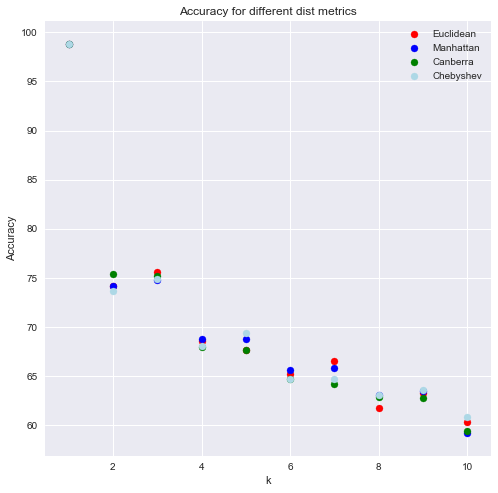

In [76]:
plt.rcParams['figure.figsize'] = (8,8)
plt.scatter(k_vals,acc_Euclidean,c= 'r',marker = 'o')
plt.scatter(k_vals,acc_Manhattan,c= 'b',marker = 'o')
plt.scatter(k_vals,acc_Canberra,c= 'g',marker = 'o')
plt.scatter(k_vals,acc_Chebyshev,c= 'lightblue',marker = 'o')

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy for different dist metrics')
plt.legend(('Euclidean','Manhattan','Canberra','Chebyshev'))

plt.show()

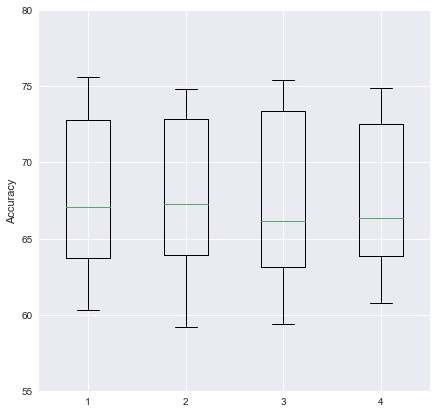

In [77]:
plt.rcParams['figure.figsize'] = (7,7)
plt.boxplot([acc_Euclidean,acc_Manhattan,acc_Canberra,acc_Chebyshev])
plt.ylim(55, 80)
#plt.legend(('Euclidean','Manhattan','Canberra','Chebyshev'))
plt.ylabel('Accuracy')
plt.show()